In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


true_records_df = pd.read_csv('/Users/zhaoxunyan/Desktop/data583/true_records.csv')
false_records_df = pd.read_csv('/Users/zhaoxunyan/Desktop/data583/false_records.csv')


true_records_df['Diagnosed'] = 1
false_records_df['Diagnosed'] = 0


concatenated_df = pd.concat([true_records_df, false_records_df], ignore_index=True)

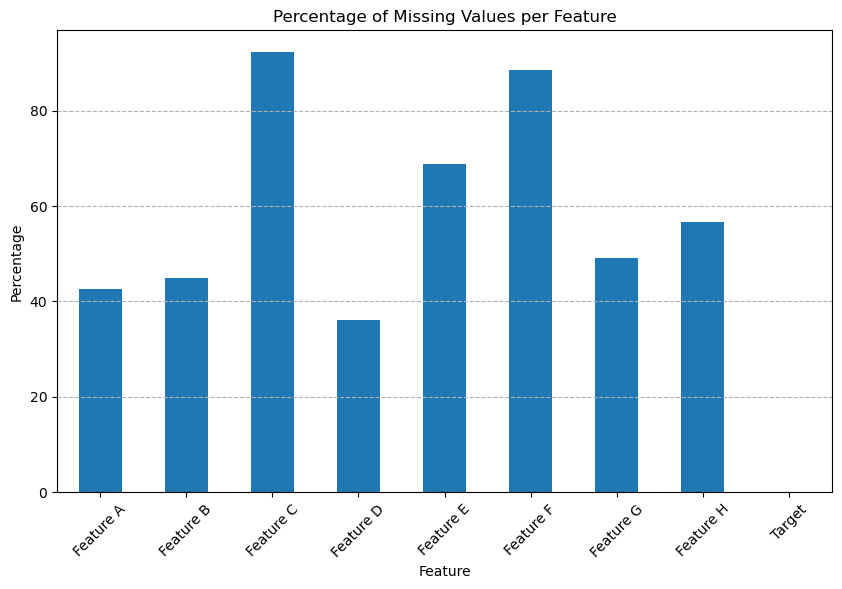

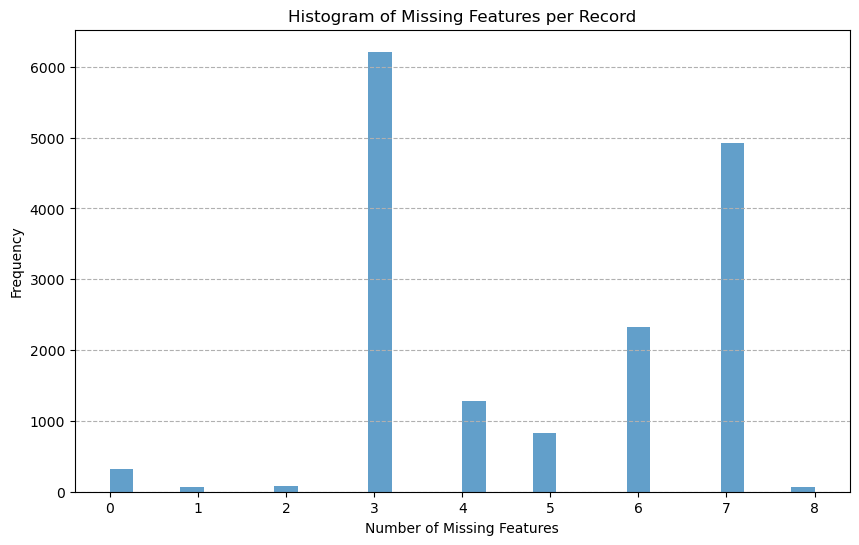

In [4]:

missing_percentage = concatenated_df.isnull().mean() * 100


plt.figure(figsize=(10, 6))
missing_percentage.drop('Diagnosed').plot(kind='bar')
plt.title('Percentage of Missing Values per Feature')
plt.ylabel('Percentage')
plt.xlabel('Feature')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()


missing_features_count = concatenated_df.isnull().sum(axis=1)
plt.figure(figsize=(10, 6))
missing_features_count.plot(kind='hist', bins=30, alpha=0.7)
plt.title('Histogram of Missing Features per Record')
plt.xlabel('Number of Missing Features')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--')
plt.show()

In [5]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [6]:

filled_df = concatenated_df.fillna(concatenated_df.mean())


X = concatenated_df.drop('Diagnosed', axis=1)
y = concatenated_df['Diagnosed']
X_train_unfilled, X_test_unfilled, y_train_unfilled, y_test_unfilled = train_test_split(
    X, y, test_size=0.2, random_state=42)


X_filled = filled_df.drop('Diagnosed', axis=1)
y_filled = filled_df['Diagnosed']
X_train_filled, X_test_filled, y_train_filled, y_test_filled = train_test_split(
    X_filled, y_filled, test_size=0.2, random_state=1111)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import time


logistic_regression = LogisticRegression(max_iter=1000)
svc = SVC(probability=True)
random_forest = RandomForestClassifier()


fit_times = {}

# Train Logistic Regression
start_time = time.time()
logistic_regression.fit(X_train_filled, y_train_filled) 
fit_times['Logistic Regression'] = time.time() - start_time

# Train Support Vector Classifier
start_time = time.time()
svc.fit(X_train_filled, y_train_filled)  
fit_times['Support Vector Classifier'] = time.time() - start_time

# Train Random Forest Classifier
start_time = time.time()
random_forest.fit(X_train_filled, y_train_filled)  
fit_times['Random Forest Classifier'] = time.time() - start_time

# Output the training times
print(fit_times)

{'Logistic Regression': 0.12949109077453613, 'Support Vector Classifier': 31.37490701675415, 'Random Forest Classifier': 0.24677705764770508}


In [1]:
import lightgbm as lgb

/Users/zhaoxunyan/opt/anaconda3/lib/python3.9/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(
/Users/zhaoxunyan/opt/anaconda3/lib/python3.9/site-packages/dask/dataframe/__init__.py:31: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


OSError: dlopen(/Users/zhaoxunyan/opt/anaconda3/lib/python3.9/site-packages/lightgbm/lib/lib_lightgbm.so, 0x0006): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: <C3EB28DD-60B6-3334-AFA2-72BBBF9DBAEF> /Users/zhaoxunyan/opt/anaconda3/lib/python3.9/site-packages/lightgbm/lib/lib_lightgbm.so
  Reason: tried: '/opt/homebrew/opt/libomp/lib/libomp.dylib' (mach-o file, but is an incompatible architecture (have 'arm64', need 'x86_64')), '/libomp.dylib' (no such file), '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/lib/libomp.dylib' (no such file), '/usr/lib/libomp.dylib' (no such file, not in dyld cache)

In [16]:
pip install torch torchvision torchaudio

  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/6a/28/d1757ec8bc7fd19da79677c35f87061da803350f640ff1d74aa08e43e303/torch-2.2.1-cp39-none-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for torchvision from https://files.pythonhosted.org/packages/58/a5/37c051d5af64d484f7436518dc423765ff4d546f343d9a6c550a96422bf6/torchvision-0.17.1-cp39-cp39-macosx_10_13_x86_64.whl.metadata
  Obtaining dependency information for torchaudio from https://files.pythonhosted.org/packages/6d/77/fa2ecf4adab64efb219081da63f6e5689f68cadc10fe574dae1a632e2110/torchaudio-2.2.1-cp39-cp39-macosx_10_13_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.8/150.8 MB 14.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 38.8 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 6.6 MB/s eta 0:00:0000:0100:01m
Note: you may need to restart the kernel to use updated packages.


In [12]:
import torch
import torch.nn as nn
import pandas as pd
from sklearn.model_selection import train_test_split
import time



X_train_tensor = torch.tensor(X_train_filled.values).float()
y_train_tensor = torch.tensor(y_train_filled.values).float().unsqueeze(1)  # Add an extra dimension


class MyNet(nn.Module):
    def __init__(self, n_features, w=64, n_hidden_layers=3):
        super(MyNet, self).__init__()
        self.in_layer = nn.Linear(n_features, w)
        self.hidden_layers = nn.ModuleList([nn.Linear(w, w) for _ in range(n_hidden_layers)])
        self.out_layer = nn.Linear(w, 1)

    def forward(self, x):
        x = nn.ReLU()(self.in_layer(x))
        for layer in self.hidden_layers:
            x = nn.ReLU()(layer(x))
        return nn.Sigmoid()(self.out_layer(x))


net = MyNet(X_train_filled.shape[1], w=48, n_hidden_layers=3)
optimizer = torch.optim.Adam(net.parameters(), lr=0.001) 
n_epochs = 400  


start_time = time.time()
for epoch in range(n_epochs):
    optimizer.zero_grad()
    output = net(X_train_tensor)
    loss = nn.BCELoss()(output, y_train_tensor)
    loss.backward()
    optimizer.step()

print(f'Training completed in {time.time() - start_time:.2f} seconds.')

Training completed in 4.47 seconds.


In [8]:
from sklearn.metrics import roc_auc_score, log_loss, f1_score


metrics = {}


models_filled = {
    'Logistic Regression': logistic_regression,
    'Support Vector Classifier': svc,
    'Random Forest Classifier': random_forest
}


for name, model in models_filled.items():
    prediction = model.predict_proba(X_test_filled)[:, 1]  
    roc_score = roc_auc_score(y_test_filled, prediction) 
    logloss = log_loss(y_test_filled, prediction)  
    f1 = f1_score(y_test_filled, (prediction > 0.5).astype(int)) 
    metrics[name] = {'ROC AUC Score': roc_score, 'Log Loss': logloss, 'F1 Score': f1}


metrics_df = pd.DataFrame.from_dict(metrics, orient='index')

print(metrics_df)


                           ROC AUC Score  Log Loss  F1 Score
Logistic Regression             1.000000  0.001893  1.000000
Support Vector Classifier       0.865137  0.466188  0.748304
Random Forest Classifier        1.000000  0.000471  1.000000


Log-loss by Missing Feature Count


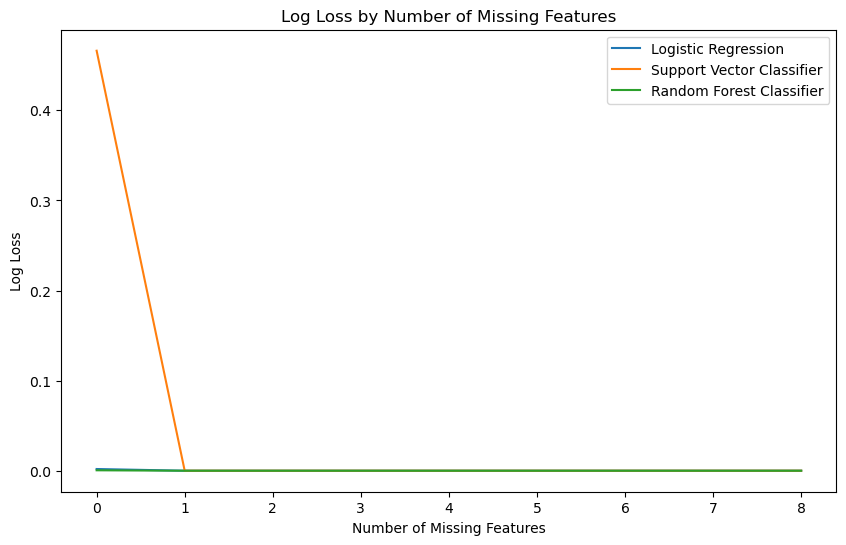

In [12]:
from sklearn.metrics import log_loss
import torch
import numpy as np
import matplotlib.pyplot as plt

def logloss_by_missing_count(X, y, metric, model):
    scores = np.zeros(9)
    for i in range(9):

        sample_filter = X.isna().sum(axis=1) == i

        if sample_filter.sum() == 0: 
            continue

        try:
            prediction = model.predict_proba(X[sample_filter].fillna(X.mean()))[:, 1]
        except:
        
            prediction = model(torch.tensor(X[sample_filter].fillna(X.mean()).values).float()).detach().numpy()
        score = metric(y[sample_filter], prediction)
        scores[i] = score
    return scores

print("Log-loss by Missing Feature Count")
plt.figure(figsize=(10,6))

models = [logistic_regression, svc, random_forest]
model_names = ['Logistic Regression', 'Support Vector Classifier', 'Random Forest Classifier']

for model, name in zip(models, model_names):
    y_pred = logloss_by_missing_count(X_test_filled, y_test_filled, log_loss, model)
    plt.plot(range(9), y_pred, label=name)

plt.xlabel("Number of Missing Features")
plt.ylabel("Log Loss")
plt.title("Log Loss by Number of Missing Features")
plt.legend()
plt.show()


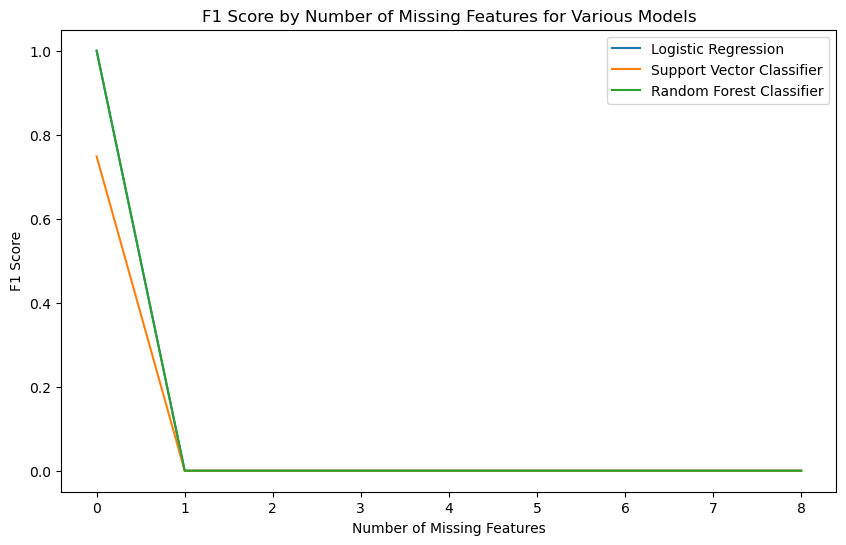

In [13]:
from sklearn.metrics import f1_score
import torch
import numpy as np
import matplotlib.pyplot as plt

def f1_by_missing_count(X, y, metric, model, is_nn=False):
    scores = np.zeros(9)
    for i in range(9):
        sample_filter = X.isna().sum(axis=1) == i
        if sample_filter.sum() == 0:  
            continue
        
        if is_nn:  
            X_filtered = torch.tensor(X[sample_filter].values).float()
            prediction = model(X_filtered).squeeze(1).detach().numpy()
        else: 
            X_filtered = X[sample_filter].fillna(X.mean())  
            prediction = model.predict_proba(X_filtered)[:, 1]
        
        score = metric(y[sample_filter], prediction > 0.5)
        scores[i] = score
    return scores

plt.figure(figsize=(10, 6))
model_names = ['Logistic Regression', 'Support Vector Classifier', 'Random Forest Classifier']
models = [logistic_regression, svc, random_forest]
for model, name in zip(models, model_names):
    y_pred = f1_by_missing_count(X_test_filled, y_test_filled, f1_score, model)
    plt.plot(range(9), y_pred, label=name)

plt.xlabel("Number of Missing Features")
plt.ylabel("F1 Score")
plt.title("F1 Score by Number of Missing Features for Various Models")
plt.legend()
plt.show()